<a href="https://colab.research.google.com/github/sike990/Zomato_EDA/blob/main/Zomato_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Initial Setup


In [1]:
!git clone https://github.com/sike990/Zomato_EDA.git

Cloning into 'Zomato_EDA'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 18 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (18/18), 1.16 MiB | 1.36 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os

#Data Preprocessing

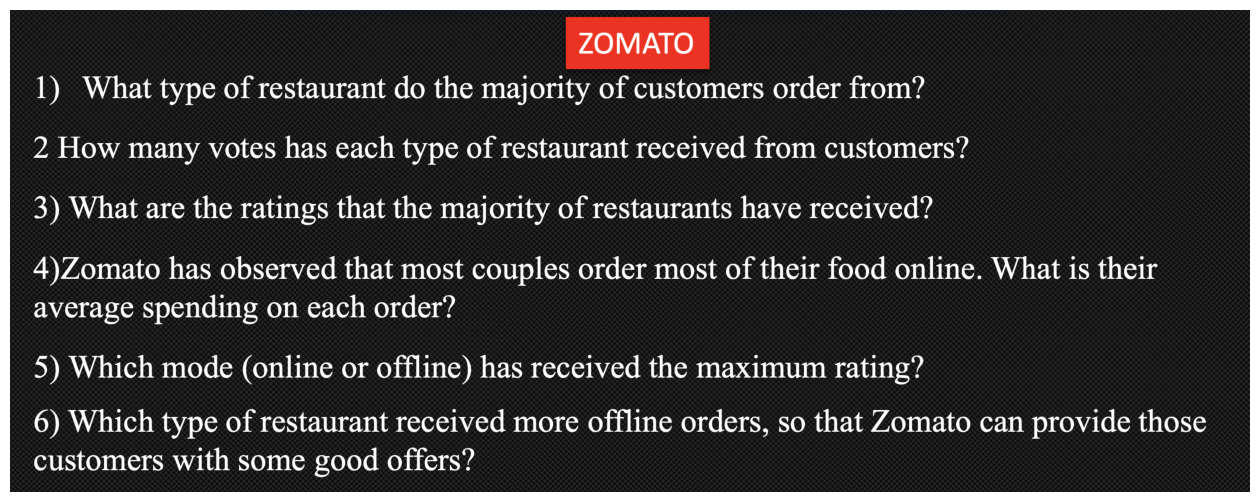

In [3]:
image = mpimg.imread("/content/Zomato_EDA/Analysis_Objective.png")

plt.figure(figsize = (16,8))
plt.imshow(image)
plt.axis(False)
plt.show()

In [4]:
data = pd.read_csv("/content/Zomato_EDA/Zomato data .csv")

In [5]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [6]:
def handleRate(value):
  value = value.split('/')
  value = value[0]
  return float(value)

data['rate'] = data['rate'].apply(handleRate)

In [7]:
data = data.rename(columns = {'listed_in(type)' : 'Kind'})

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   Kind                         148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB




```
Question 1: Which kind of resturant is more popular among customers
```



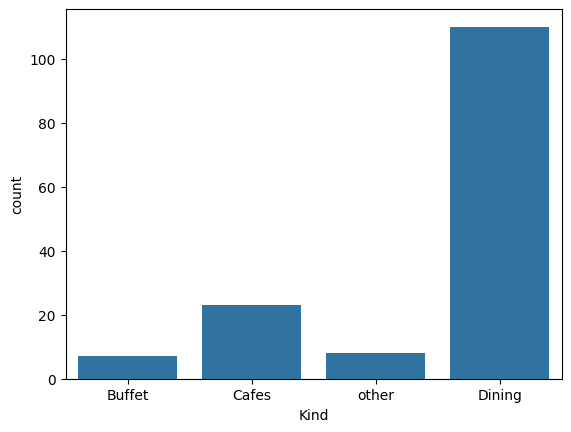

In [9]:
sns.countplot(x = data["Kind"])
plt.show()



```
Clearly the Dining kind of resturant is more popular
```





```
Question 2 : How many votes deos each kind of returant has received from custumers?
```



In [10]:
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),Kind
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [11]:
gk = data.groupby('Kind')

for kind , kind_data in gk:
  print(kind)
  print(kind_data['votes'].sum())

Buffet
3028
Cafes
6434
Dining
20363
other
9367


In [12]:
ndf = pd.DataFrame(columns = ['Kind' , 'Votes'])
for kind , kind_data in gk:
  total_votes = kind_data['votes'].sum()
  ndf = pd.concat([ndf , pd.DataFrame({'Kind' : [kind] , "Votes" : [total_votes]})] , ignore_index = True)


In [13]:
ndf.columns

Index(['Kind', 'Votes'], dtype='object')

In [14]:
ndf

,Kind,Votes
0,Buffet,3028
1,Cafes,6434
2,Dining,20363
3,other,9367


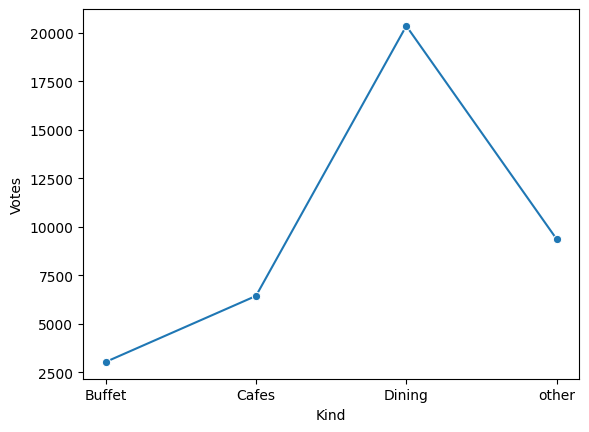

In [15]:
sns.lineplot(x = ndf['Kind'] , y = ndf['Votes'] , marker = 'o')
plt.show()



```
Conclusion : Dining kind of resturant has recieved maximum number of votes
```





```
Question 3 : What are the ratings that majority of resturant has recived?
```



In [16]:
ndfr = pd.DataFrame(columns = ['Rating' , 'Count'])
for rating , rating_data in data.groupby('rate'):
  count = rating_data['rate'].count()
  ndfr = pd.concat([ndfr , pd.DataFrame({"Rating" : [rating] , "Count": [count]})] , ignore_index = True)

<ipython-input-16-ec28ab66d960>:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ndfr = pd.concat([ndfr , pd.DataFrame({"Rating" : [rating] , "Count": [count]})] , ignore_index = True)


In [17]:
ndfr

,Rating,Count
0,2.6,1
1,2.8,2
2,2.9,7
3,3.0,2
4,3.1,7
5,3.2,7
6,3.3,14
7,3.4,12
8,3.5,6
9,3.6,11


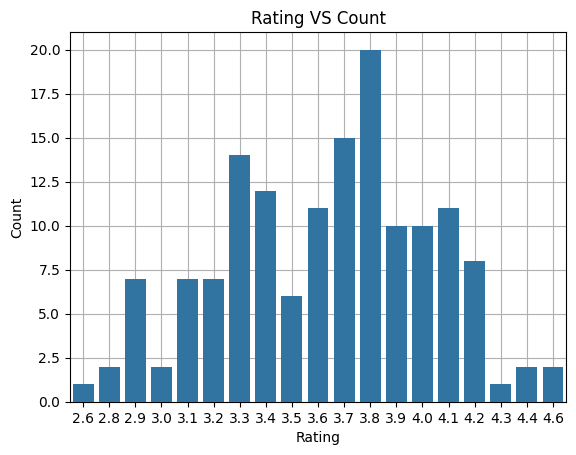

In [18]:
sns.countplot(x = data['rate'] , data = data , zorder = 4)
plt.grid(True , zorder = 0)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Rating VS Count" , c = 'black')
plt.show()



```
Conclusion : Most of the Resturants have recived a rating of 3.8.
```



#Question 4:


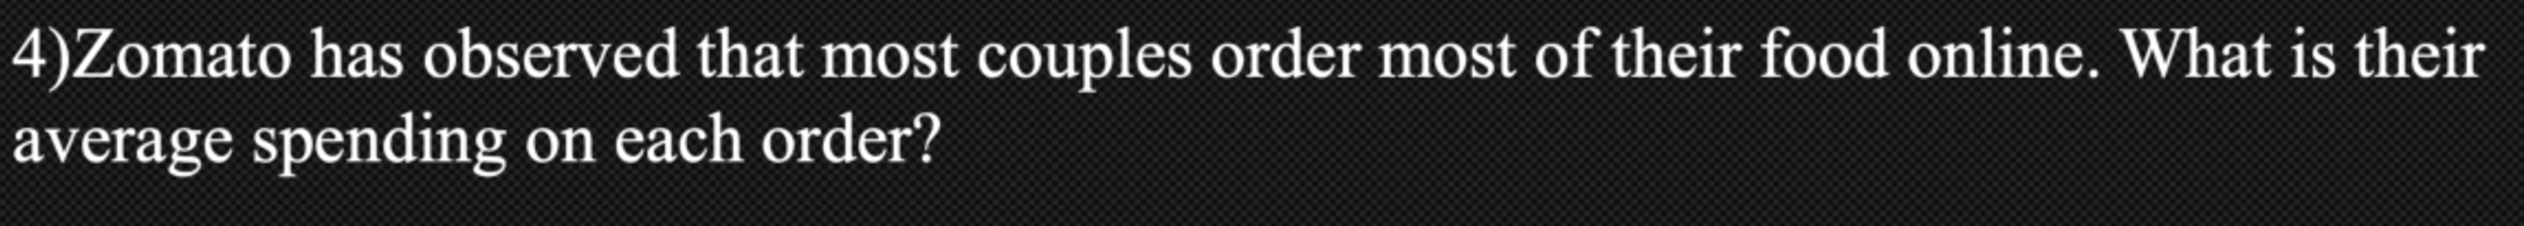

In [19]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'Kind'],
      dtype='object')

In [20]:
data.head(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),Kind
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,800,Buffet
7,Onesta,Yes,Yes,4.6,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0,324,700,other
9,Smacznego,Yes,No,4.2,504,550,Cafes


In [21]:
avg_cost_spend = data[data['online_order'] == "Yes" ]
avg_cost_spent = avg_cost_spend['approx_cost(for two people)'].mean()

In [22]:
avg_cost_spend = avg_cost_spend.reset_index(drop = True)
avg_cost_spend

,name,online_order,book_table,rate,votes,approx_cost(for two people),Kind
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Timepass Dinner,Yes,No,3.8,286,600,Buffet
4,Onesta,Yes,Yes,4.6,2556,600,Cafes
5,Penthouse Cafe,Yes,No,4.0,324,700,other
6,Smacznego,Yes,No,4.2,504,550,Cafes
7,Village Café,Yes,No,4.1,402,500,Cafes
8,Cafe Shuffle,Yes,Yes,4.2,150,600,Cafes
9,The Coffee Shack,Yes,Yes,4.2,164,500,Cafes


In [23]:
print("The avarage cost spent by couples are :" , avg_cost_spent)

The avarage cost spent by couples are : 510.3448275862069


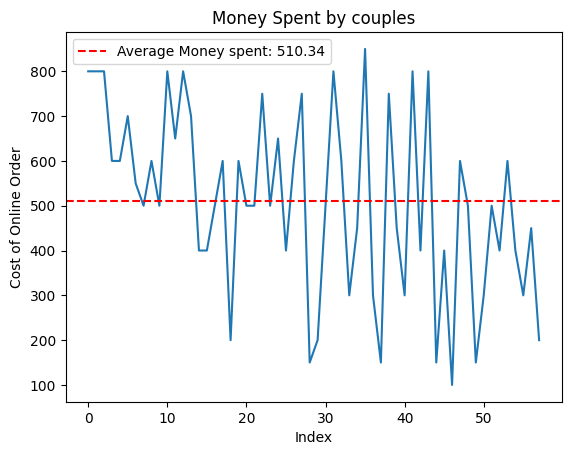

In [24]:
sns.lineplot(x = avg_cost_spend.index , y = avg_cost_spend['approx_cost(for two people)'] )
plt.axhline(avg_cost_spent , color = 'red' , linestyle = '--' , label = "Average Money spent: {:.2f}".format(avg_cost_spent) , )
plt.xlabel("Index")
plt.ylabel("Cost of Online Order")
plt.title("Money Spent by couples")
plt.legend()
plt.show()


```
The avarage cost spent by couples are : 510.34
```



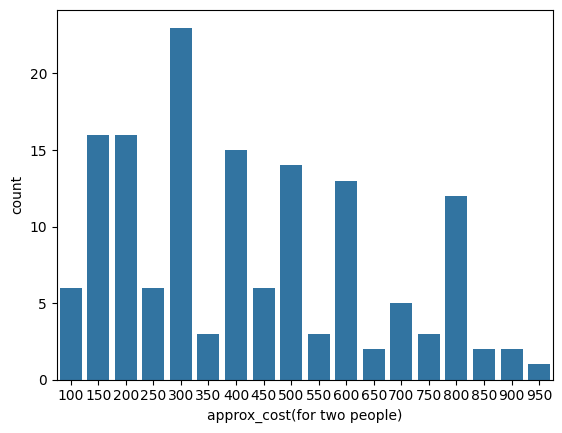

In [25]:
sns.countplot(x = data['approx_cost(for two people)'] , data = data)
plt.show()

#Question 5

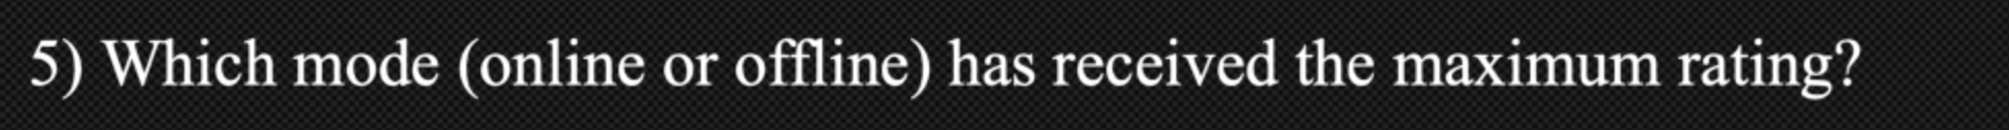

In [26]:
data.columns

,name,online_order,book_table,rate,votes,approx_cost(for two people),Kind
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


<Axes: xlabel='rate', ylabel='Density'>

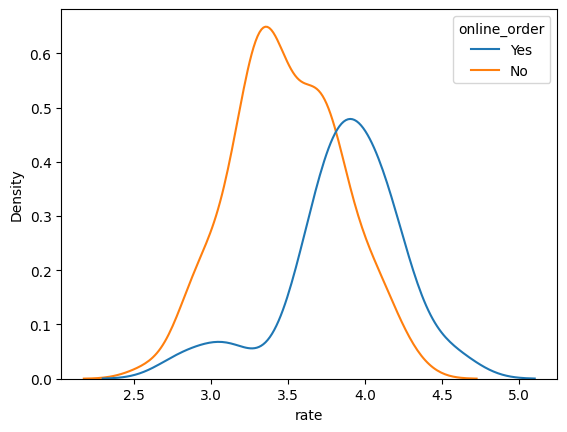

In [27]:
sns.kdeplot(x = data['rate'] , data = data , hue = 'online_order')

<Axes: xlabel='rate', ylabel='Density'>

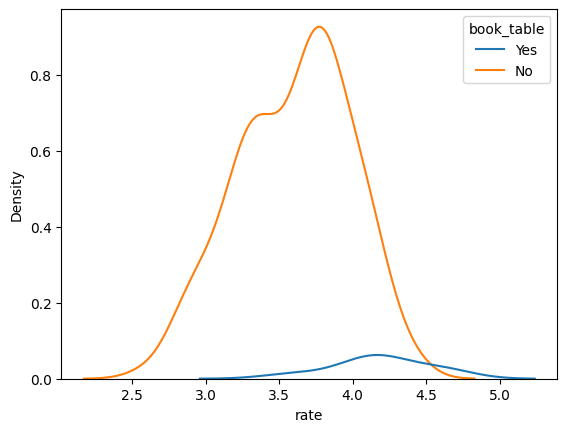

In [29]:
sns.kdeplot(x = data['rate'] , data = data , hue = 'book_table')

In [58]:
online_data = data[data["online_order"] == "Yes"]
#online_data = online_data[online_data["book_table"] == "No"]

In [59]:
online_data = online_data.reset_index(drop = True)

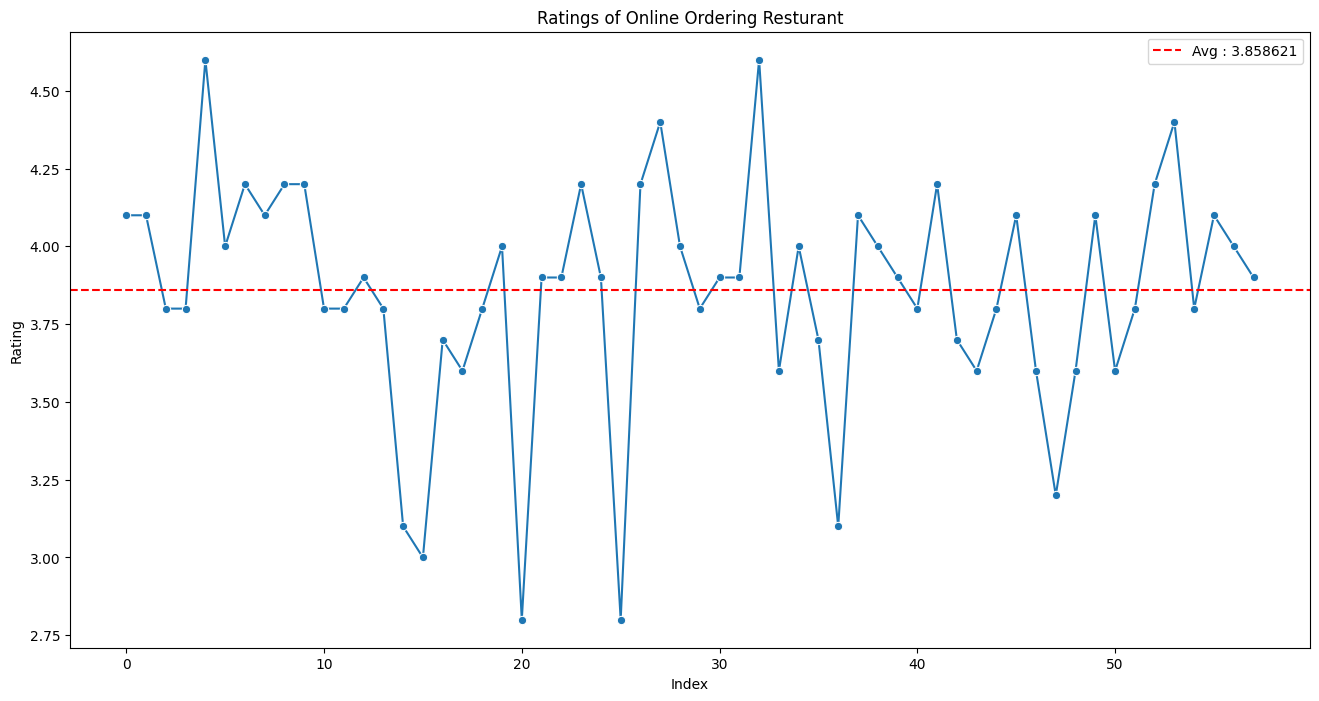

In [60]:
plt.figure(figsize = (16,8))
sns.lineplot(x = online_data.index ,y = online_data['rate']  , marker = 'o')
plt.axhline(online_data['rate'].mean() , ls = '--' , c = 'red' , label = "Avg : {:2f}".format(online_data['rate'].mean()))
plt.legend()
plt.title("Ratings of Online Ordering Resturant")
plt.xlabel("Index")
plt.ylabel("Rating")
plt.show()

##for offline data

In [61]:
offline_data = data[data["book_table"] == "Yes"]
#offline_data = offline_data[offline_data["online_order"] == "No"]

In [62]:
offline_data = offline_data.reset_index(drop = True)

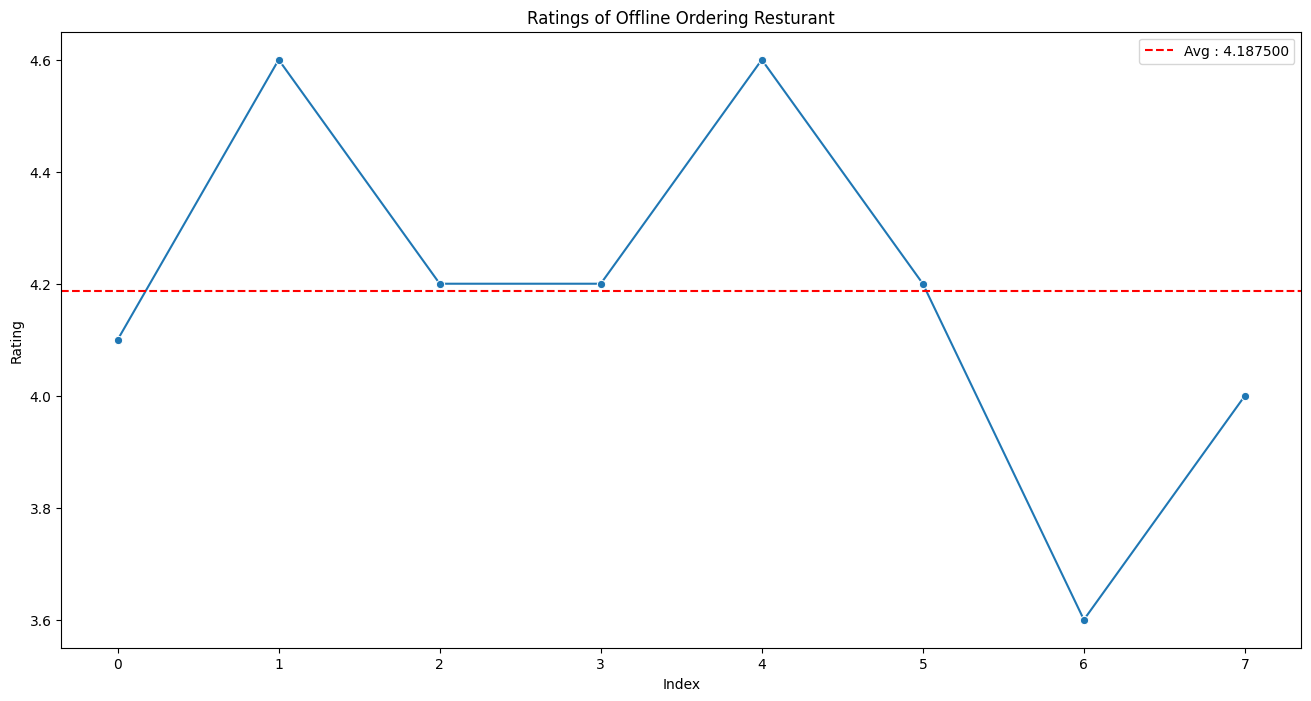

In [63]:
plt.figure(figsize = (16,8))
sns.lineplot(x = offline_data.index ,y = offline_data['rate']  , marker = 'o')
plt.axhline(offline_data['rate'].mean() , ls = '--' , c = 'red' , label = "Avg : {:2f}".format(offline_data['rate'].mean()))
plt.legend()
plt.title("Ratings of Offline Ordering Resturant")
plt.xlabel("Index")
plt.ylabel("Rating")
plt.show()



```
Conclusion : Offline Mode has revieved a maximum average rating of 4.18 than online 3.85
```



#Question 6

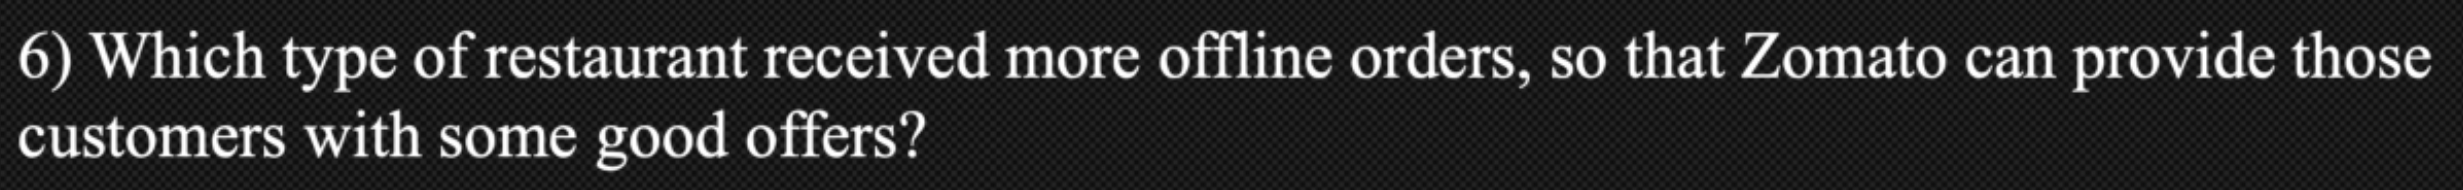

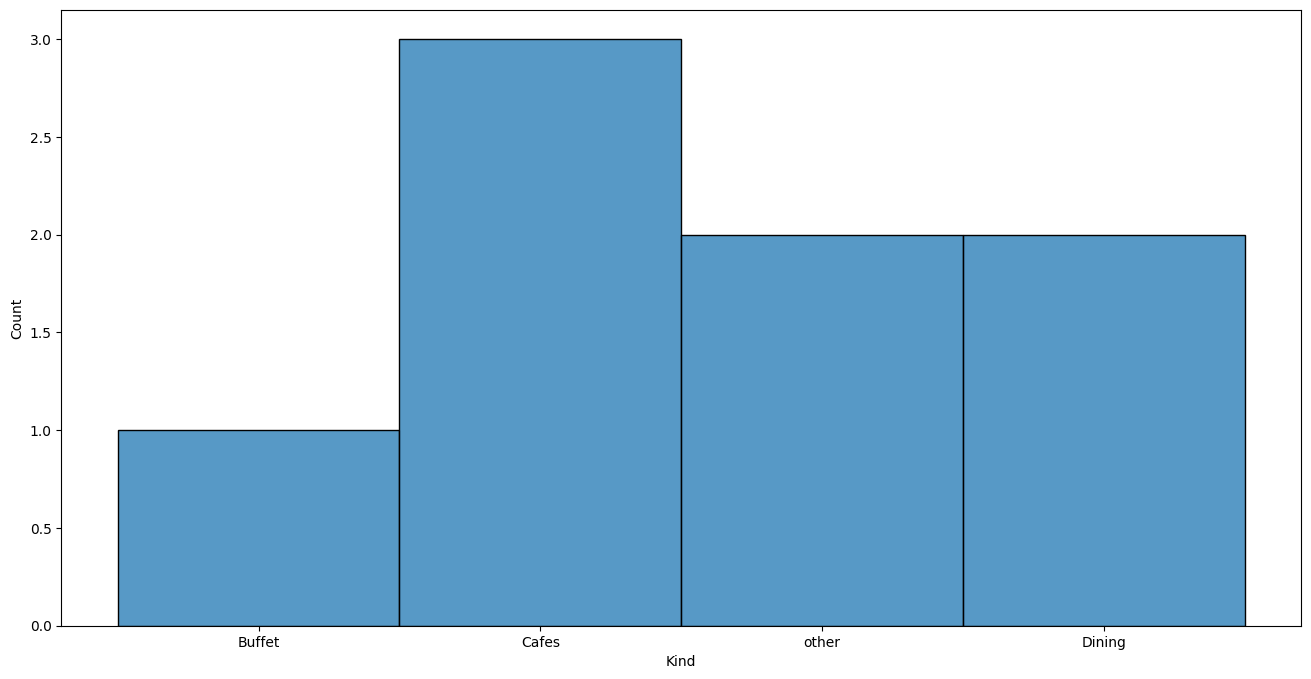

In [66]:
plt.figure(figsize = (16 , 8))
sns.histplot(x = offline_data["Kind"])
plt.show()



```
Conclusion : "Cafes" kind have resturant have recieved more numbers of offline order than other kind thus Zomato can target them.
```

